In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
%matplotlib inline

# Load dataset

In [76]:
dataset = pd.read_csv('dataset/dev1_works_distance_dataset.csv')
y = dataset['label'].values
features = dataset.columns.difference(['label'])
X = dataset[features].values
dataset.head()

publisher.publisher_name  publisher.place_of_publication  publication_type  \
0                  0.512195                        0.590909             0.750   
1                  0.000000                        0.000000             0.125   
2                  0.457447                        0.418605             0.000   
3                  0.404255                        0.515152             0.000   
4                  0.019608                        0.666667             0.000   

   country_of_publication  language  contributor.name  contributor.role  \
0                0.714286  0.727273          0.789474          0.789474   
1                0.000000  0.000000          0.812500          0.142857   
2                0.000000  0.333333          0.880000          0.142857   
3                0.250000  0.333333          0.391304          0.200000   
4                0.333333  0.000000          0.800000          0.142857   

      title      idno  idno.type   subject  publishing_work_items.value  \
0  0.816327  0.894737   0.645161  0.600000                     0.866667   
1  0.000000  0.277778   0.375000  0.000000                     0.000000   
2  0.000000  0.352941   0.318182  0.922078                     0.619048   
3  0.090909  0.487179   0.444444  0.000000                     0.428571   
4  0.000000  0.261538   0.277778  0.000000                     0.333333   

   publishing_work_items.type  publishing_work_items.unit  label  
0                    0.862069                    0.862069      0  
1                    0.000000                    0.000000      0  
2                    0.000000                    0.000000      0  
3                    0.000000                    0.000000      0  
4                    0.142857                    0.142857      0

## Split dataset by label (match|not_match) for visualisation

In [77]:
dataset_matched = dataset[dataset['label']==1]
dataset_not_matched = dataset[dataset['label']==0]

In [78]:
print(sum(dataset_matched[features].mean()))
print(sum(dataset_not_matched[features].mean()))

1.61690406007
2.59288067289


In [79]:
def broken_plot(dataset, column, axis0_limits, axis1_limits, num_bins):
    f, axis = plt.subplots(2, 1, sharex=True)
    axis[0].hist(dataset[[column]].values, num_bins, alpha=0.5)
    axis[1].hist(dataset[[column]].values, num_bins, alpha=0.5)
    axis[0].set_ylim(axis0_limits[0], axis0_limits[1])
    axis[1].set_ylim(axis1_limits[0], axis1_limits[1])

    axis[0].spines['bottom'].set_visible(False)
    axis[1].spines['top'].set_visible(False)
    axis[0].xaxis.tick_top()
    axis[0].tick_params(labeltop='off')
    axis[1].xaxis.tick_bottom()
    d = .015
    kwargs = dict(transform=axis[0].transAxes, color='k', clip_on=False)
    axis[0].plot((-d,+d),(-d,+d), **kwargs)
    axis[0].plot((1-d,1+d),(-d,+d), **kwargs)
    kwargs.update(transform=axis[1].transAxes)
    axis[1].plot((-d,+d),(1-d,1+d), **kwargs)
    axis[1].plot((1-d,1+d),(1-d,1+d), **kwargs)

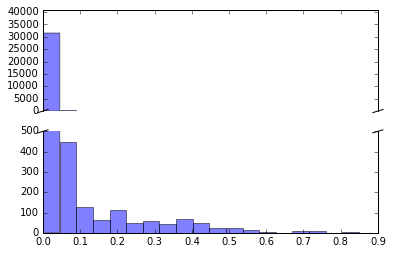

In [80]:
broken_plot(dataset, 'title', (20, 41000), (0, 500), 20)

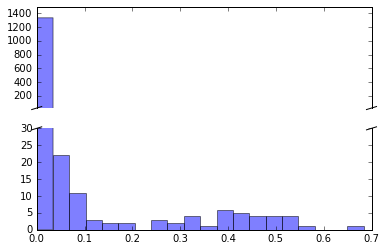

In [81]:
broken_plot(dataset_matched, 'title', (20, 1500), (0, 30), 20)

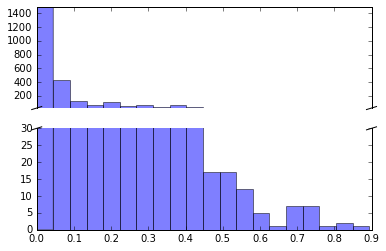

In [82]:
broken_plot(dataset_not_matched, 'title', (20, 1500), (0, 30), 20)

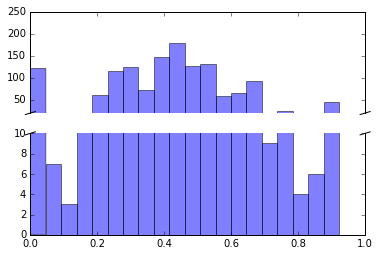

In [83]:
broken_plot(dataset_matched, 'idno', (20, 250), (0, 10), 20)

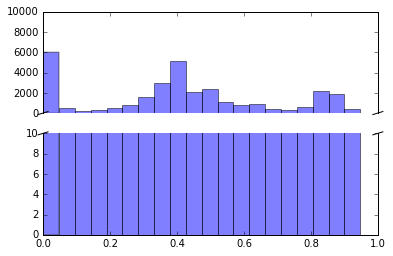

In [84]:
broken_plot(dataset_not_matched, 'idno', (20, 10000), (0, 10), 20)

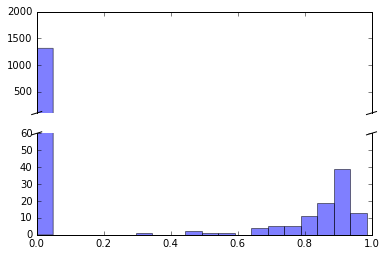

In [85]:
broken_plot(dataset_matched, 'subject', (100, 2000), (0, 60), 20)

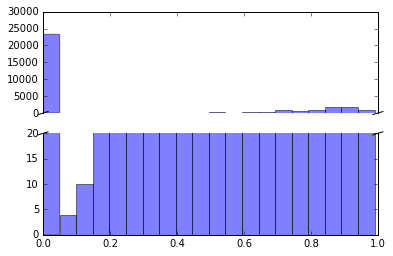

In [86]:
broken_plot(dataset_not_matched, 'subject', (20, 30000), (0, 20), 20)

# Applying classification

## Splitting dataset to train and test

In [87]:
train_data, test_data, train_output, test_output = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
model = linear_model.LogisticRegression()
model.fit(train_data, train_output)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [133]:
model_features = pd.DataFrame(np.zeros((len(features), 2)), columns=['features', 'coeff'])
model_features['features'] = features
model_features['coeff'] = model.coef_[0]

In [134]:
model_features

features     coeff
0                 contributor.name  0.408929
1                 contributor.role -1.176405
2           country_of_publication -3.231175
3                             idno  4.980807
4                        idno.type -4.416695
5                         language  3.204957
6                 publication_type -7.013411
7   publisher.place_of_publication -1.296463
8         publisher.publisher_name  0.310198
9       publishing_work_items.type -2.725465
10      publishing_work_items.unit -2.620257
11     publishing_work_items.value -3.645273
12                         subject  0.345326
13                           title  2.501461

In [135]:
model.score(test_data, test_output)

0.95694146490959242

In [136]:
from sklearn import metrics
predictions = model.predict(test_data)
fpr, tpr, thresholds = metrics.roc_curve(test_output, predictions, pos_label=2)
metrics.auc(fpr, tpr)

C:\Users\Viktor_Pishchulin\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:534: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


nan

In [139]:
metrics.precision_score(test_output, predictions)

0.66666666666666663

In [142]:
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0
for y, y_hat in zip(test_output, predictions):
    if y == y_hat:
        if y_hat == 1:
            true_positive += 1
        else:
            true_negative += 1
    else:
        if y_hat == 1:
            false_positive += 1
        else:
            false_negative += 1
print('true_positive: %s' % true_positive)
print('true_negative: %s' % true_negative)
print('false_positive: %s' % false_positive)
print('false_negative: %s' % false_negative)

true_positive: 10
true_negative: 6235
false_positive: 5
false_negative: 276
